## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

>**References have been taken from several Sklearn, Seaborn and Matplotlib Documentation to understand how to implement the different functions.**


## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [3]:
# Load the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


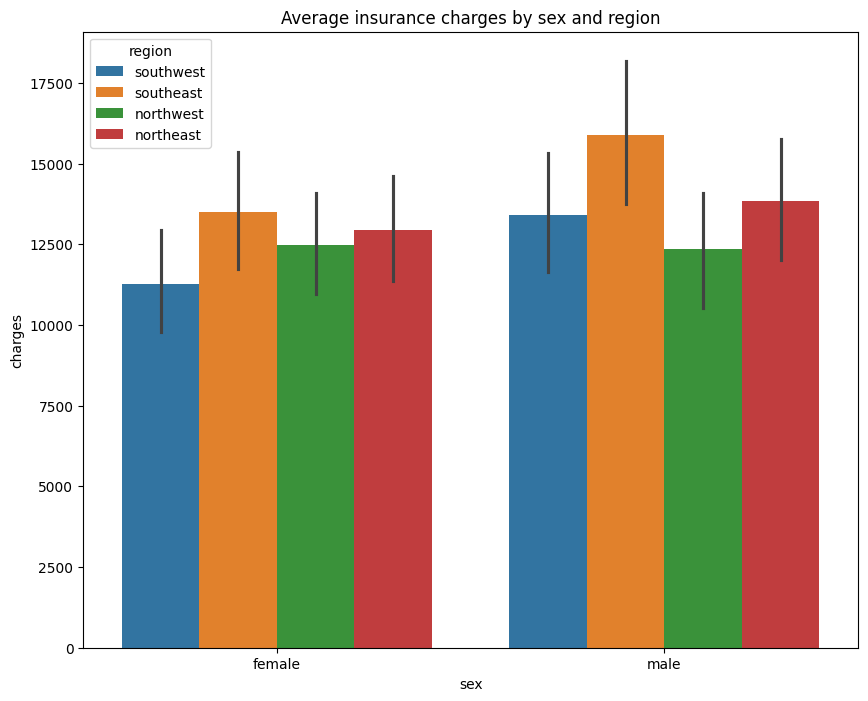

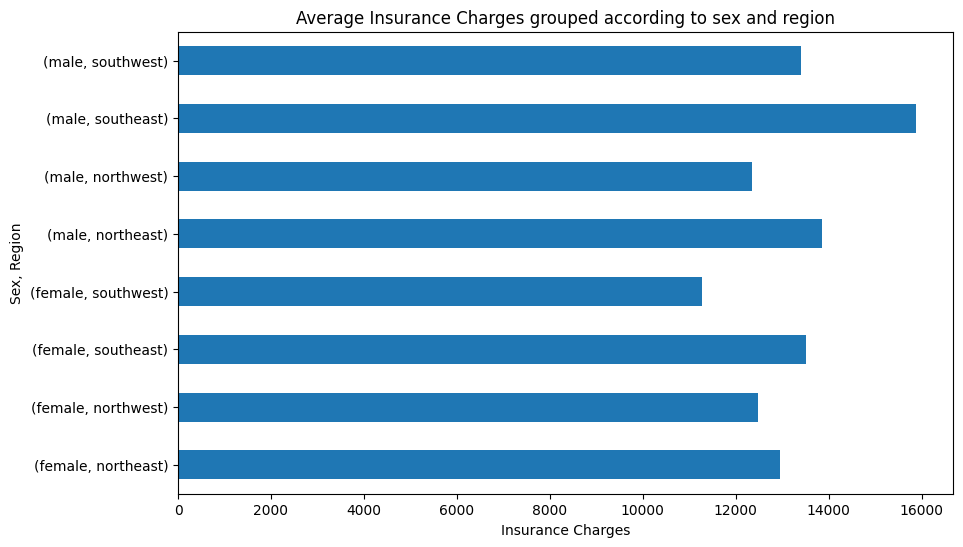

In [4]:
### Code here

plt.figure(figsize=(10,8))
sns.barplot(insurance_df, x="sex", y="charges", hue="region", estimator="mean")
plt.title("Average insurance charges by sex and region")
plt.show()

# The insurances are first grouped by sex and region.
# It can be done using groupby()
grouped_insurance_charges = insurance_df.groupby(['sex','region'])
average_insurance_charges = grouped_insurance_charges['charges'].mean()
average_insurance_charges.plot(kind='barh', figsize=(10, 6))

# Horizontal Bar Plot
plt.title("Average Insurance Charges grouped according to sex and region")
plt.xlabel("Insurance Charges")
plt.ylabel("Sex, Region")
plt.show()


#### Observation : **As we can see from the given diagram, the Insurance charges are highest for Region: Southeast and Gender: Male**

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

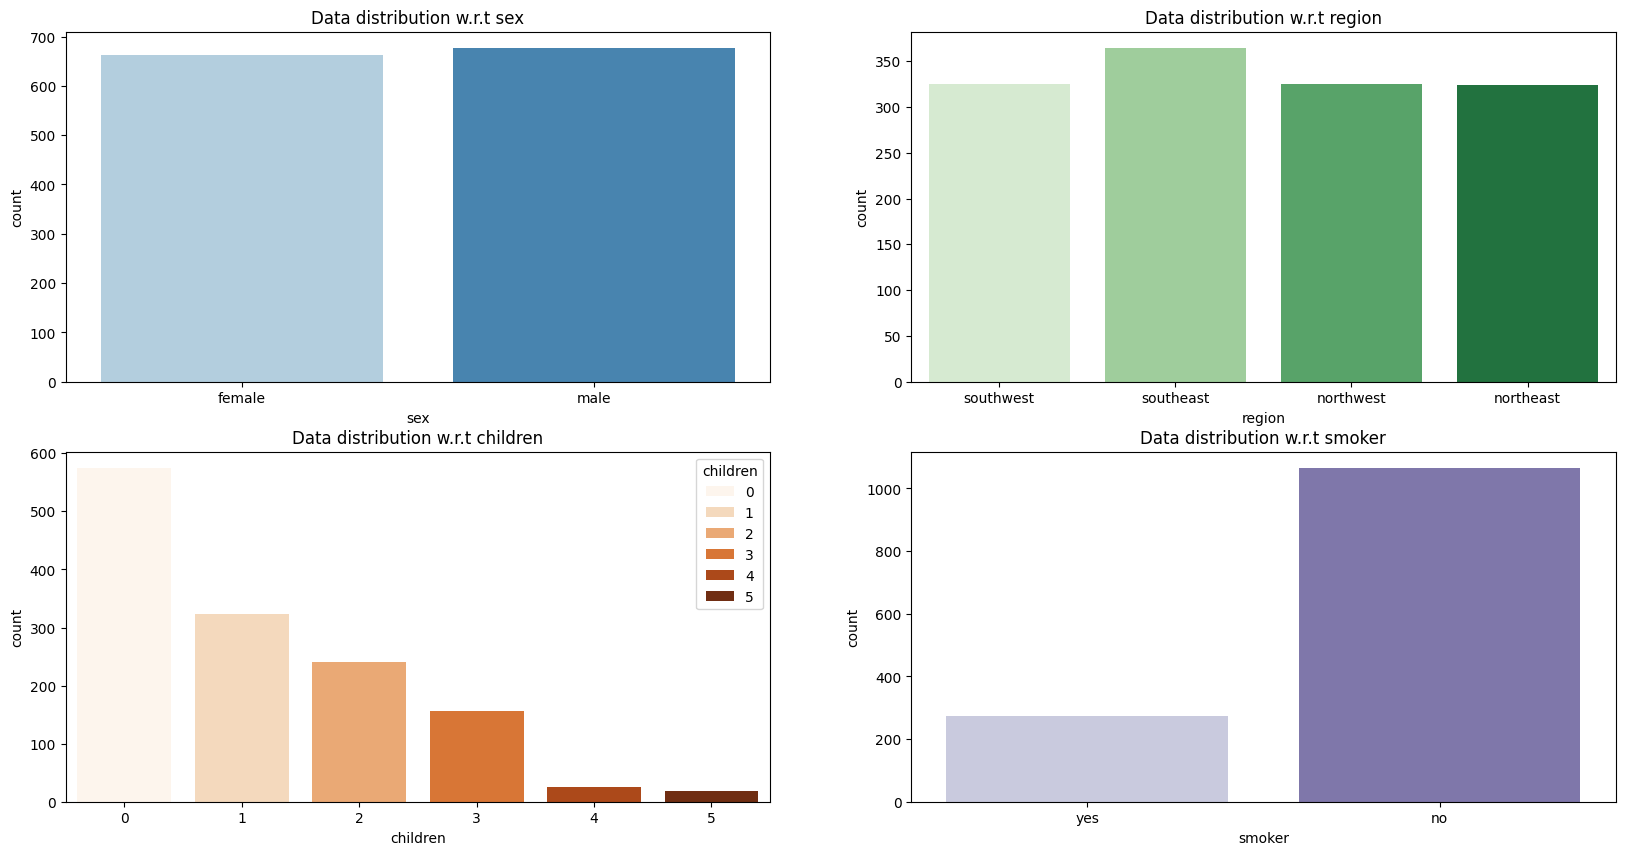

In [5]:
### Code here
# Ref: https://seaborn.pydata.org/generated/seaborn.barplot.html

categorical_features = ['sex', 'region', 'children', 'smoker']
target = insurance_df['charges']
fig, ax = plt.subplots(2,2, figsize=(20,10))
subplot_palettes = ['Blues', 'Greens', 'Oranges', 'Purples']

for var,subplot, color in zip(categorical_features, ax.flatten(), subplot_palettes):
    # Creating a subplot for each of the categorical variables
    # For future conflicts, hue should be mentioned along with palette
    sns.countplot(x =var, data=insurance_df,ax=subplot,
                palette=color, hue=var, legend='auto')
    subplot.set_title(f"Data distribution w.r.t {var}")
plt.show()


**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

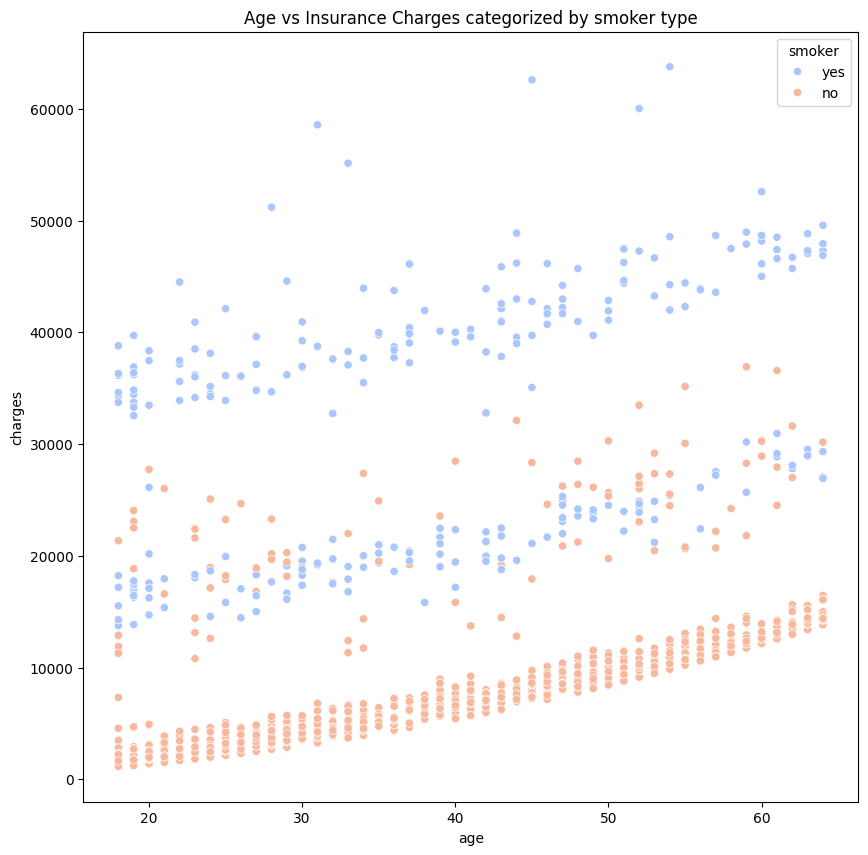

In [6]:
### Code here
# Ref: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize=(10,10))
plt.title("Age vs Insurance Charges categorized by smoker type")
sns.scatterplot(data=insurance_df, x="age", y="charges", hue="smoker", palette="coolwarm")

plt.show()

## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [7]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']
insurance_X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

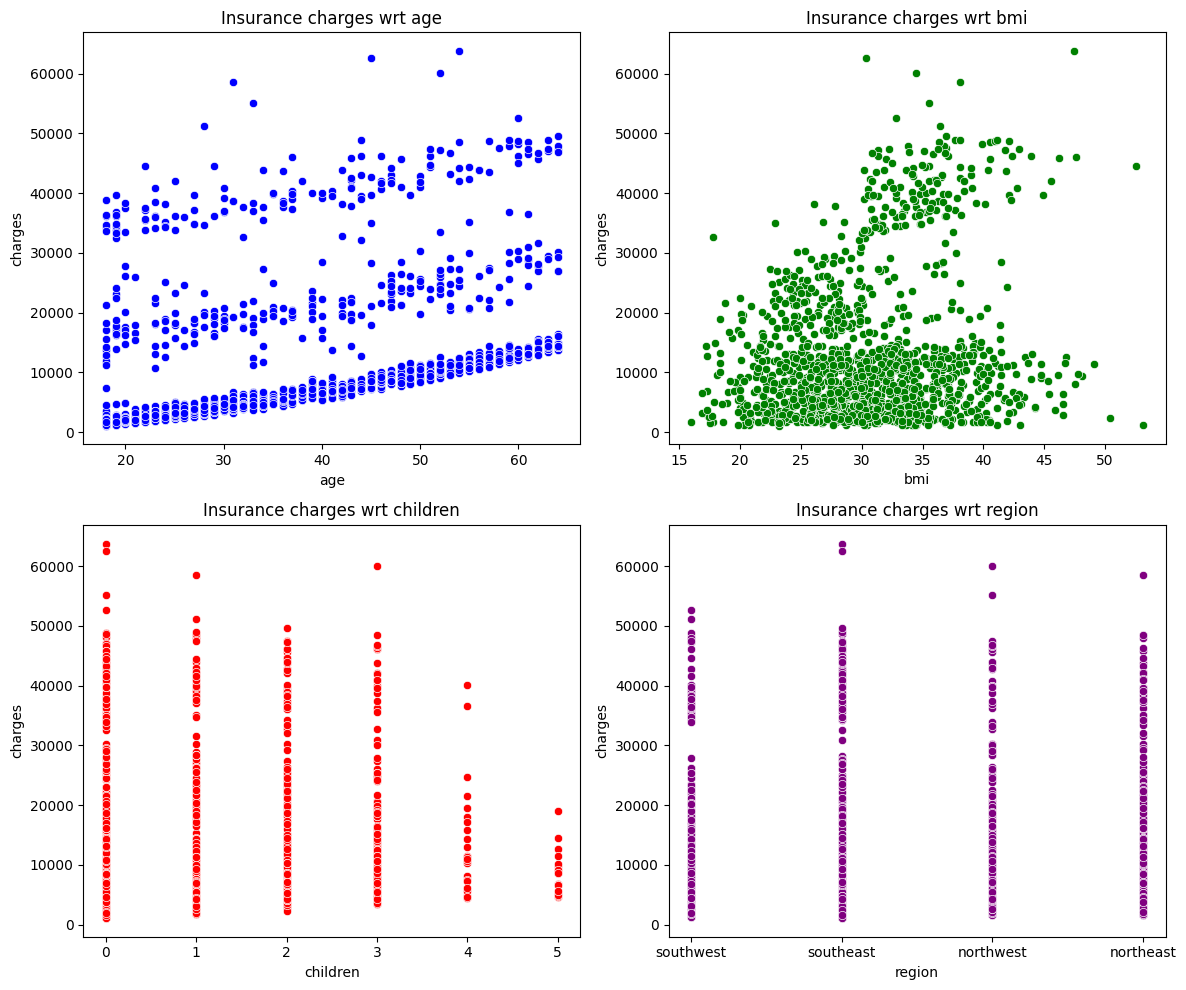

In [8]:
### Code here

features = ['age', 'bmi', 'children', 'region']
fig, ax = plt.subplots(2,2, figsize=(12,10))
subplot_palettes = ['blue', 'green', 'red', 'purple']

for var, subplot, color in zip(features, ax.flatten(), subplot_palettes):
    # Creating a subplot for each of the feature variables
    # For future conflicts, hue should be mentioned along with palette
    sns.scatterplot(x=var, y=target, data=insurance_X,ax=subplot, legend=False, color=color)
    subplot.set_title(f"Insurance charges wrt {var}")

plt.tight_layout()

plt.show()

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


- There are a large number of outliers in the plots for bmi, age specifically.
- The featues like children and region do not follow collinearality.

> Hence Linear Regression might not be best for this model.

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [9]:
### Code here
ohe_features = ['sex', 'region', 'smoker']
numerical_features = list(set(insurance_X.columns) - set(ohe_features))
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
cat_insurance_X = pd.DataFrame(ohe.fit_transform(insurance_df[ohe_features]),
                                   columns=ohe.get_feature_names_out())
num_insurance_X = insurance_X[numerical_features].reset_index(drop=True)
encoded_insurance_X = pd.concat([cat_insurance_X, num_insurance_X], axis=1)

encoded_insurance_X


,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,children,bmi,age
0,0.0,0.0,0.0,1.0,1.0,0,27.900,19
1,1.0,0.0,1.0,0.0,0.0,1,33.770,18
2,1.0,0.0,1.0,0.0,0.0,3,33.000,28
3,1.0,1.0,0.0,0.0,0.0,0,22.705,33
4,1.0,1.0,0.0,0.0,0.0,0,28.880,32
...,...,...,...,...,...,...,...,...
1333,1.0,1.0,0.0,0.0,0.0,3,30.970,50
1334,0.0,0.0,0.0,0.0,0.0,0,31.920,18
1335,0.0,0.0,1.0,0.0,0.0,0,36.850,18
1336,0.0,0.0,0.0,1.0,0.0,0,25.800,21


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

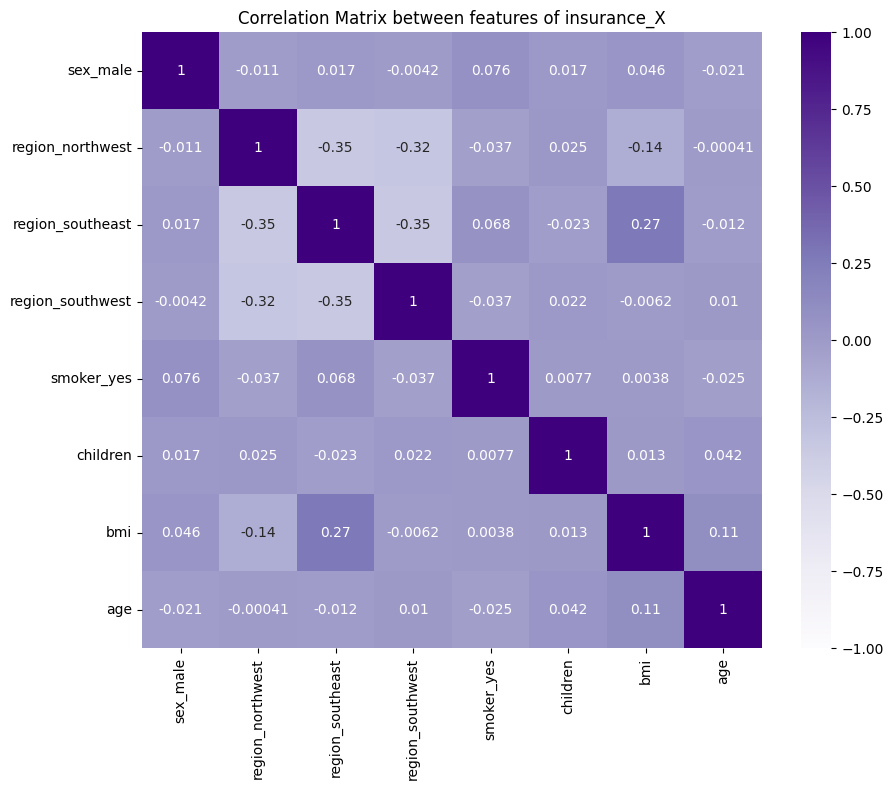

In [10]:
### Code here

# Calculate the correlation between features in insurance_X
corr_matrix = encoded_insurance_X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Matrix between features of insurance_X')
plt.show()

> #### Observation : 

- It is necessary to drop high correlated features because one of the problems of linear regression is handling multicollinearity. This means when features are highly correlated with one another. It results in X.X(transpose) become almost singular and hence finding inverse becomes impossible. We have to proceed by removing highly correlated features to get better results using linear regression.

- Since none of them are correlated >= 0.8, none of the features are dropped.

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [11]:
### Code here
insurance_X_train, X_dev, insurance_y_train, y_dev = train_test_split(encoded_insurance_X, insurance_y, test_size=0.4, random_state=42)

insurance_X_val, insurance_X_test, insurance_y_val, insurance_y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

print(f'Train data: {insurance_X_train.shape, insurance_y_train.shape}')
print(f'Validation data: {insurance_X_val.shape, insurance_y_val.shape}')
print(f'Test data: {insurance_X_test.shape, insurance_y_test.shape}')

Train data: ((802, 8), (802,))
Validation data: ((268, 8), (268,))
Test data: ((268, 8), (268,))


**2.1.6 Standardize the columns in the feature matrices.**

In [12]:
### Code here
scaler = StandardScaler()

# Fit and transform for the train data
insurance_X_train = scaler.fit_transform(insurance_X_train)

# Only transform for the validation and test data
insurance_X_val = scaler.transform(insurance_X_val)
insurance_X_test = scaler.transform(insurance_X_test)

In [13]:
# Adding a column of ones to include the bias term

insurance_X_train = np.hstack([np.ones((insurance_X_train.shape[0], 1)), insurance_X_train])
insurance_X_val = np.hstack([np.ones((insurance_X_val.shape[0], 1)), insurance_X_val])
insurance_X_test = np.hstack([np.ones((insurance_X_test.shape[0], 1)), insurance_X_test])

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [14]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        # My own implementation of the close form solution
        # X_square = X.T @ X
        # regularization = self.alpha * (np.eye(X.shape[1]))
        # X_square = X_square + regularization
        # determinant = np.linalg.det(X_square)

        # # To check whether we can calculate inverse
        # inverse = np.zeros((X.shape[0], X.shape[0]))
        # if determinant !=0:
        #     inverse = np.linalg.inv(X_square)
        
        # self.w = inverse @ X.T @ y
        self.w = np.linalg.solve(X.T.dot(X) + self.alpha * np.eye(X.shape[1]), X.T.dot(y))
        return
        

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X.dot(self.w)

        return y_pred


**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [15]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [16]:
### Code here
model = LinearRegression(alpha=0)
model.train(insurance_X_train, insurance_y_train)

# Predicting on train, test and val

y_train_pred = model.predict(insurance_X_train)
y_val_pred = model.predict(insurance_X_val)
y_test_pred = model.predict(insurance_X_test)

# # Calculating the r2
r2_train = r2_score(insurance_y_train, y_train_pred)
r2_val = r2_score(insurance_y_val, y_val_pred)
r2_test = r2_score(insurance_y_test, y_test_pred)

print(f'R^2 Score on Training data: {r2_train:.5f}')
print(f'R^2 Score on Validation data: {r2_val:.5f}')
print(f'R^2 Score on Test data: {r2_test:.5f}')

get_report(y_test_pred, insurance_y_test)

R^2 Score on Training data: 0.74228
R^2 Score on Validation data: 0.76201
R^2 Score on Test data: 0.75845


,Prediction,Actual
Position,,
1,31420.384684,22478.60000
2,9022.472491,5836.52040
3,11754.829781,6373.55735
266,12825.269068,10564.88450
267,10289.283270,2927.06470
268,13409.956235,9877.60770


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [17]:
y_train_mean = np.mean(insurance_y_train)

y_train_pred_baseline = np.full(insurance_y_train.shape, y_train_mean)  
y_val_pred_baseline = np.full(insurance_y_val.shape, y_train_mean)
y_test_pred_baseline = np.full(insurance_y_test.shape, y_train_mean)   

r2_train_baseline = r2_score(insurance_y_train, y_train_pred_baseline)
r2_val_baseline = r2_score(insurance_y_val, y_val_pred_baseline)
r2_test_baseline = r2_score(insurance_y_test, y_test_pred_baseline)


print(f'R^2 on training set: {r2_train_baseline:.6f}')
print(f'R^2 on validation set: {r2_val_baseline:.6f}')
print(f'R^2 on test set: {r2_test_baseline:.6f}')

get_report(y_test_pred_baseline, insurance_y_test)

R^2 on training set: 0.000000
R^2 on validation set: -0.009359
R^2 on test set: -0.006598


,Prediction,Actual
Position,,
1,13297.764279,22478.60000
2,13297.764279,5836.52040
3,13297.764279,6373.55735
266,13297.764279,10564.88450
267,13297.764279,2927.06470
268,13297.764279,9877.60770


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

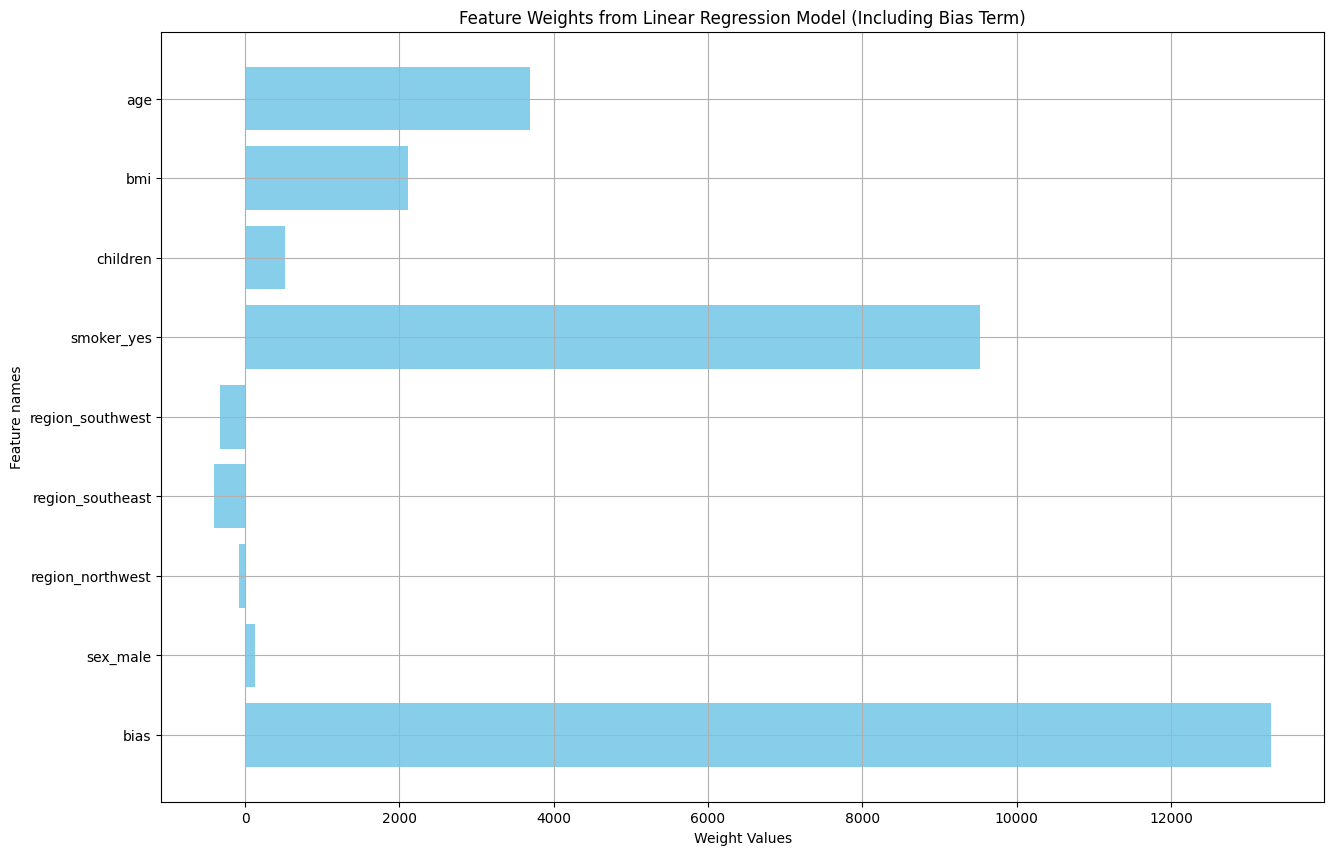

In [18]:
### Code here
feature_names = ['bias'] + list(encoded_insurance_X.columns)

weights_with_bias = model.w

plt.figure(figsize=(15,10))
plt.barh(feature_names, weights_with_bias, color='skyblue') 
plt.xlabel('Weight Values')
plt.ylabel('Feature names')
plt.title('Feature Weights from Linear Regression Model (Including Bias Term)')
plt.grid(True)

plt.show()


**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

> - Bias has a very high contribution to insurance charges. 
> - Apart from that, in the features, smoker_yes has the highest contribution to insurance charges.

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

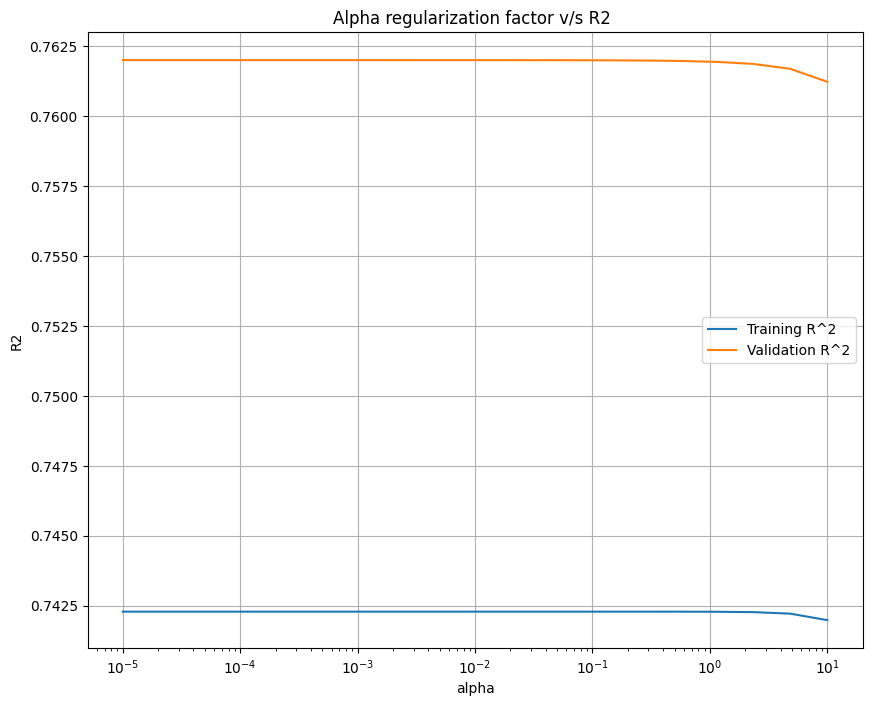

In [19]:
### Code here
alphas = np.logspace(-5,1,20)

# For storing R2 for each alpha for train and validation
train_r2 = []
val_r2 = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(insurance_X_train, insurance_y_train)

    train_preds = model.predict(insurance_X_train)
    val_preds = model.predict(insurance_X_val)

    train_r2.append(r2_score(insurance_y_train, train_preds))
    val_r2.append(r2_score(insurance_y_val, val_preds))

plt.figure(figsize=(10, 8))
plt.semilogx(alphas, train_r2, label='Training R^2')
plt.semilogx(alphas, val_r2, label='Validation R^2')
plt.grid(True)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend()
plt.title("Alpha regularization factor v/s R2 ")
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

>- Increasing alpha to a too large value makes the model more simplistic, because of weights tending towards 0.
>- This leads to underfitting. It has a plateau and then even decrease. So we need to find a balance for the alpha value.

>If training R2 is much greater than validation R2, the model is overfitting. But that is not the case here.
If training R2 and validation R2 are both low, the model is underfitting. But that also is not the case here. 
Hence, the model can be called consistent.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [20]:
### Code here
loan_data_df= pd.read_csv('./loan_data.csv')
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [22]:
categorical_features = loan_data_df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical Features in DF are: {categorical_features}")

numerical_features = loan_data_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Features in DF are: {numerical_features}")

Categorical Features in DF are: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Features in DF are: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [23]:
loan_data_df['Credit_History'].value_counts()
# This is numerical data, but still have only binary values.

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


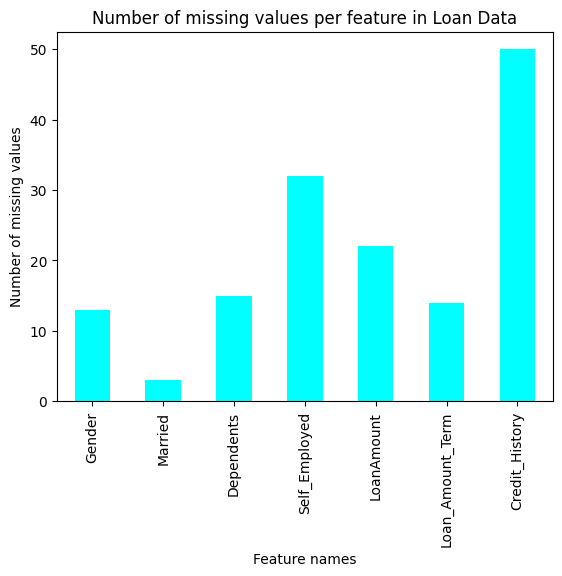

In [24]:
### Code here
missing_values = loan_data_df.isnull().sum()
print(missing_values)
missing_values = missing_values[missing_values>0]

missing_values.plot(kind='bar', color='cyan')
plt.xlabel("Feature names")
plt.ylabel("Number of missing values")
plt.title("Number of missing values per feature in Loan Data")

plt.show()

In [25]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
### Code here
# Since Married has a less proportion of data having missing value, those rows are dropped.
loan_data_df.dropna(subset=['Married'], inplace=True)

# Gender, Dependents and Loan_Amount_Term can be filled with the most commonly occuring value without hampering the output intuitively.
loan_data_df['Gender'].fillna(loan_data_df['Gender'].mode()[0], inplace=True)
loan_data_df['Dependents'].fillna(loan_data_df['Dependents'].mode()[0],inplace=True)
loan_data_df['Loan_Amount_Term'].fillna(loan_data_df['Loan_Amount_Term'].mode()[0],inplace=True)

# Since Loan_Amount is a numerical variable, the best to handle missing values is to take mean of all the other data.
loan_data_df['LoanAmount'].fillna(loan_data_df['LoanAmount'].mean(), inplace=True)

# For Credit_History, Self_Employed which are numerical columns but has only two values, it is best represented and handled like the categorical variables.
loan_data_df['Credit_History'].fillna(loan_data_df['Credit_History'].mode()[0],inplace=True)
loan_data_df['Self_Employed'].fillna(loan_data_df['Self_Employed'].mode()[0],inplace=True)

loan_data_df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.369492,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


> - Since Married has a less proportion of data having missing value, those rows are dropped.
> - Gender, Dependents and Loan_Amount_Term can be filled with the most commonly occuring value without hampering the output intuitively.
> - Since Loan_Amount is a numerical variable, the best to handle missing values is to take mean of all the other data. 
> - For Credit_History, Self_employed which are a numerical columns but has only two values, it is best represented and handled like the categorical variables.


In [27]:
missing_values = loan_data_df.isnull().sum()
print("Missing value after cleanup:")
print(missing_values)


Missing value after cleanup:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


> No more missing values

**2.2.3 Encode the categorical variables.**

In [28]:
loan_data_X = loan_data_df.drop('Loan_Status', axis=1)
target = loan_data_df['Loan_Status']

In [29]:
ohe_features = ['Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area']
ordinal_features = ['Dependents']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first'), ohe_features),  
        ('ord', OrdinalEncoder(), ordinal_features)
    ],
    remainder='drop'  # drop remaining numerical features
)
loan_data_X_cat = pd.DataFrame(preprocessor.fit_transform(loan_data_X),
                               columns=preprocessor.get_feature_names_out())
num_loan_data_X = loan_data_X[numerical_features].reset_index(drop=True)
loan_data_X_encoded = pd.concat([loan_data_X_cat, num_loan_data_X], axis=1)


In [30]:
loan_data_X_encoded

,ohe__Gender_Male,ohe__Married_Yes,ohe__Education_Not Graduate,ohe__Self_Employed_Yes,ohe__Property_Area_Semiurban,ohe__Property_Area_Urban,ord__Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5849,0.0,146.369492,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4583,1508.0,128.000000,360.0,1.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,3000,0.0,66.000000,360.0,1.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0
607,1.0,1.0,0.0,0.0,0.0,0.0,3.0,4106,0.0,40.000000,180.0,1.0
608,1.0,1.0,0.0,0.0,0.0,1.0,1.0,8072,240.0,253.000000,360.0,1.0
609,1.0,1.0,0.0,0.0,0.0,1.0,2.0,7583,0.0,187.000000,360.0,1.0


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [31]:
### Code here
label_counts = target.value_counts()
label_probabilities = label_counts/label_counts.sum()

print(f"Label Counts: {label_counts} \n")
print(f"\nLabel Probabilities: {label_probabilities}\n")

Label Counts: Loan_Status
Y    419
N    192
Name: count, dtype: int64 


Label Probabilities: Loan_Status
Y    0.685761
N    0.314239
Name: count, dtype: float64



> **Comment:**
The labels are somewhat unbalanced.
P(Y) = 0.68 which is almost double of P(N) = 0.31. However it is not too drastic like 80/20 or 90/10.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

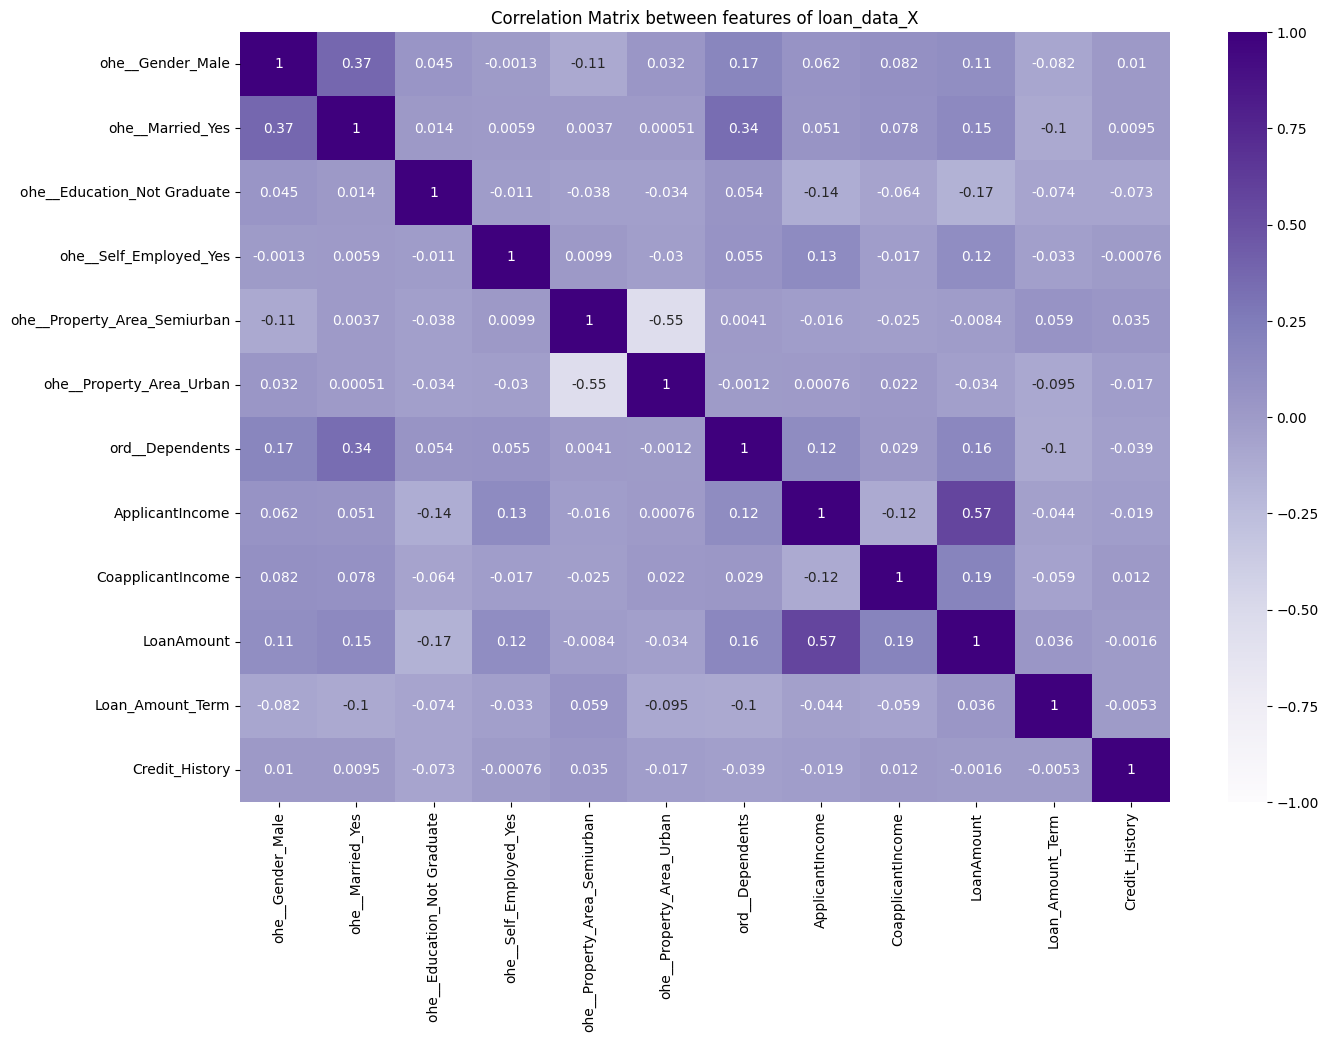

In [32]:
### Code here
correlation_matrix_loan = loan_data_X_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_loan, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Matrix between features of loan_data_X')
plt.show()

In [33]:
### Code here

threshold = 0.9
high_correlation = np.where(abs(correlation_matrix_loan) >= threshold)

# Create a set to hold features to drop
features_to_drop = set()
if not features_to_drop:
    print("No features to drop")



No features to drop


#### Observation
> **None of features have correlation beyond that threshold, so there is nothing to drop.**

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [34]:
# Label Encoding and transform to numpy
le = LabelEncoder()
target = le.fit_transform(target)

# 2. Train-test Split
loan_data_X_train, X_dev, loan_data_y_train, y_dev = train_test_split(loan_data_X_encoded, target, test_size=0.4, random_state=42)

loan_data_X_val, loan_data_X_test, loan_data_y_val, loan_data_y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

print(f'Train data: {loan_data_X_train.shape, loan_data_y_train.shape}')
print(f'Validation data: {loan_data_X_val.shape, loan_data_y_val.shape}')
print(f'Test data: {loan_data_X_test.shape, loan_data_y_test.shape}')

# 3. Standard Scaling
scaler = StandardScaler()
loan_data_X_train = scaler.fit_transform(loan_data_X_train)

loan_data_X_val = scaler.transform(loan_data_X_val)
loan_data_X_test = scaler.transform(loan_data_X_test)

# 4. Adding a column of ones to include the bias term

loan_data_X_train = np.hstack([np.ones((loan_data_X_train.shape[0], 1)), loan_data_X_train])
loan_data_X_val = np.hstack([np.ones((loan_data_X_val.shape[0], 1)), loan_data_X_val])
loan_data_X_test = np.hstack([np.ones((loan_data_X_test.shape[0], 1)), loan_data_X_test])


Train data: ((366, 12), (366,))
Validation data: ((122, 12), (122,))
Test data: ((123, 12), (123,))


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [35]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        y = y.reshape(-1,1)
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

Accuracy of baseline on test: 0.8292682926829268


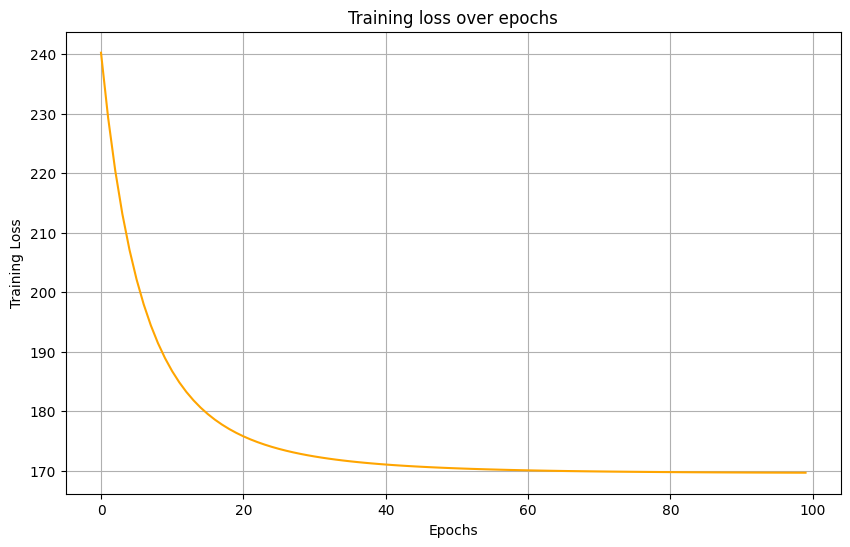

In [36]:
### Code here
# i)
model = LogisticRegression(alpha=0,t=100,eta=1e-3)
loss = model.train(loan_data_X_train, loan_data_y_train)
y_test_pred = model.predict(loan_data_X_test)
acc_alpha0 = accuracy_score(loan_data_y_test, y_test_pred)
print(f"Accuracy of baseline on test: {acc_alpha0}")

plt.figure(figsize=(10, 6))
plt.plot(loss, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training loss over epochs')
plt.grid(True)
plt.show()



In [37]:
### Code here
# ii)
best_accuracy_score = float('-inf')
best_params = {}
best_model = None
np.random.seed(1048)

def validate_model(alpha, t, eta):
    model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model.train(loan_data_X_train, loan_data_y_train)
    y_pred = model.predict(loan_data_X_val)
    accuracy = accuracy_score(loan_data_y_val, y_pred)
    return accuracy, model


# Random search
for _ in range(20):
    alpha = np.random.uniform(0, 1) 
    eta = np.random.uniform(0, 0.001)
    t = np.random.randint(1, 100)
    

    acc, model = validate_model(alpha=alpha, eta=eta, t=t)

    if acc > best_accuracy_score:
        best_accuracy_score = acc
        best_params = {'alpha': alpha, 'eta': eta, 't': t}
        best_model = model

y_test_pred = best_model.predict(loan_data_X_test)
acc_best = accuracy_score(loan_data_y_test, y_test_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Best accuracy on train data: {best_accuracy_score}")

Best Hyperparameters: {'alpha': 0.5652782446699081, 'eta': 0.0005457920793324813, 't': 34}
Best accuracy on train data: 0.819672131147541


In [38]:
### Code here
print(f"Baseline accuracy for test : {acc_alpha0}, Best accuracy for test: {acc_best} ")

Baseline accuracy for test : 0.8292682926829268, Best accuracy for test: 0.8292682926829268 


>**Both the baseline and the hypermeter-tuned test accuracy are same.**

### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

(13, 1)


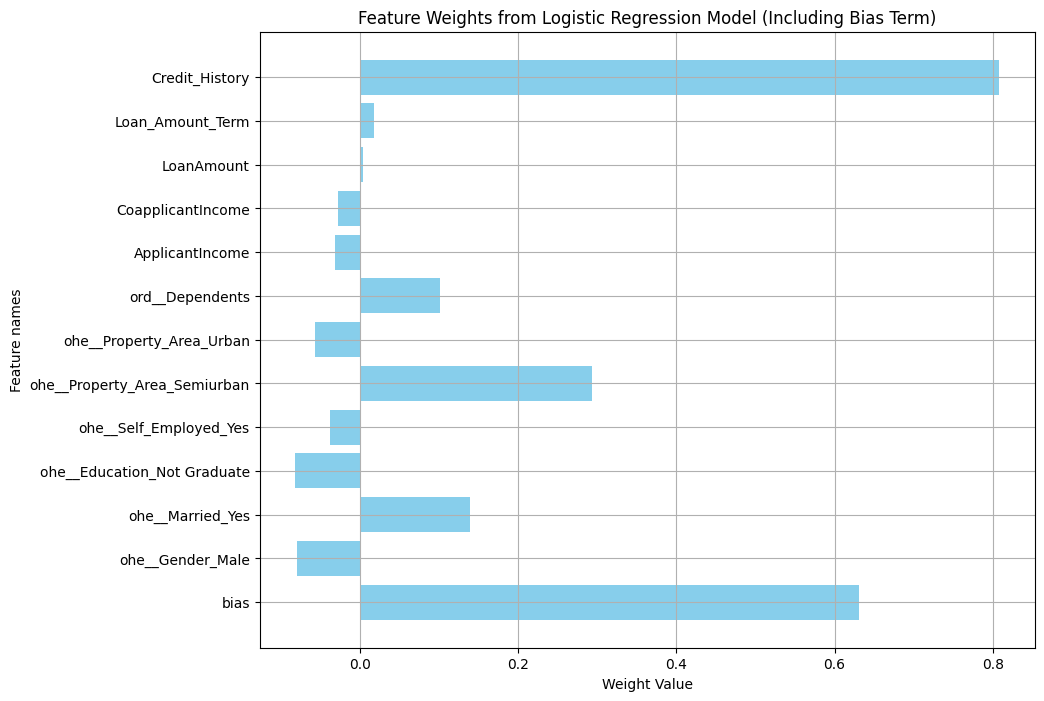

In [39]:
### Code here
feature_names = ['bias'] + list(loan_data_X_encoded.columns)

weights_with_bias = best_model.w.flatten()
print(best_model.w.shape)

plt.figure(figsize=(10,8))
plt.barh(feature_names, weights_with_bias, color='skyblue') 
plt.xlabel('Weight Value')
plt.ylabel('Feature names')
plt.title('Feature Weights from Logistic Regression Model (Including Bias Term)')
plt.grid(True)

plt.show()

> **Credit history has the highest importance in terms of feature weight to predict Loan status.**

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [40]:
### Code here

svm_primal_model = LinearSVC(dual=False)
svm_primal_model.fit(loan_data_X_train, loan_data_y_train)

train_pred = svm_primal_model.predict(loan_data_X_train)
val_pred = svm_primal_model.predict(loan_data_X_val)
test_pred = svm_primal_model.predict(loan_data_X_test)

train_accuracy = accuracy_score(loan_data_y_train, train_pred)
val_accuracy = accuracy_score(loan_data_y_val, val_pred)
test_accuracy = accuracy_score(loan_data_y_test, test_pred)

print("Accuracies for Primal SVM:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Accuracies for Primal SVM:
Training Accuracy: 0.7978
Validation Accuracy: 0.8197
Test Accuracy: 0.8293


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [41]:
### Code here
svm_dual_model = SVC(max_iter=10000)
svm_dual_model.fit(loan_data_X_train, loan_data_y_train)

train_pred = svm_dual_model.predict(loan_data_X_train)
val_pred = svm_dual_model.predict(loan_data_X_val)
test_pred = svm_dual_model.predict(loan_data_X_test)

train_accuracy = accuracy_score(loan_data_y_train, train_pred)
val_accuracy = accuracy_score(loan_data_y_val, val_pred)
test_accuracy = accuracy_score(loan_data_y_test, test_pred)

print("Accuracies for Dual SVM:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Accuracies for Dual SVM:
Training Accuracy: 0.8087
Validation Accuracy: 0.8115
Test Accuracy: 0.8293
